# Orthography vs Phonemic Transcriptions

### Packages

In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from data_processing import DataGenerator
from model import GenderLSTM
from model_evaluation import baseline_accuracy, compare_accuracies, statistical_check
from visualization import plot_metrics

### Hyperparameters


In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_dim = 128
hidden_size = 256
batch_size = 64
n_epochs = 20
lr = 0.001

In [3]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [4]:
# Datasets with the 'b class
orthography_data_3gen = nlexique[['lexeme', 'gen']]
phonetic_data_3gen = nlexique[['phon', 'gen']]

In [5]:
# Datasets without the 'b' class
orthography_data_2gen = nlexique[nlexique['gen'] != 'b'][['lexeme', 'gen']]
phonetic_data_2gen = nlexique[nlexique['gen'] != 'b'][['phon', 'gen']]

### Orthographic Form (3 classes)

In [6]:
or3_train_set, or3_valid_set = train_test_split(orthography_data_3gen, test_size=0.2)

In [7]:
or3_train_generator = DataGenerator(or3_train_set, reverse_nouns=True)
or3_valid_generator = DataGenerator(or3_valid_set, parentgenerator=or3_train_generator, reverse_nouns=True)

or3_model = GenderLSTM(or3_train_generator, embedding_dim, hidden_size, device=DEVICE, reversed=True)
or3_train, or3_valid = or3_model.train_model(or3_train_generator, 
                                             or3_valid_generator, 
                                             n_epochs, 
                                             batch_size, 
                                             lr, 
                                             save_model='../saved_models/orthography_3gen.pth')

Epoch: 0
[Train] Loss: 0.4460   Accuracy: 83.81%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 67.39%
[Valid] Loss: 0.4440   Accuracy: 85.09%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 70.69%
----------------------------------------------------------------------------------------------------
Epoch: 1
[Train] Loss: 0.3492   Accuracy: 87.28%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 74.49%
[Valid] Loss: 0.3977   Accuracy: 86.26%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 75.42%
----------------------------------------------------------------------------------------------------
Epoch: 2
[Train] Loss: 0.3208   Accuracy: 88.25%   Beginning of plateau (index): 1   Accuracy at the beginning of plateau: 64.62%
[Valid] Loss: 0.3716   Accuracy: 87.37%   Beginning of plateau (index): 2   Accuracy at the beginning of plateau: 76.25%
---------------------------------------------

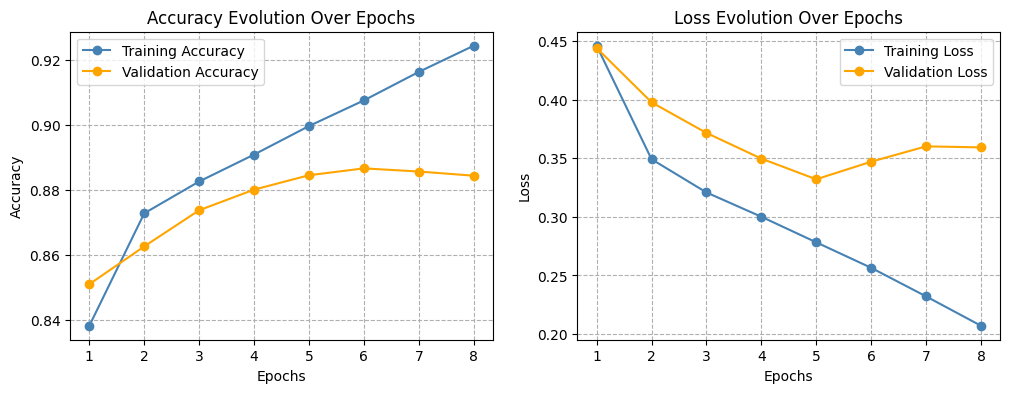

In [8]:
plot_metrics(or3_train['accuracy'], or3_valid['accuracy'], or3_train['loss'], or3_valid['loss'])

The most frequent label in the dataset is: m


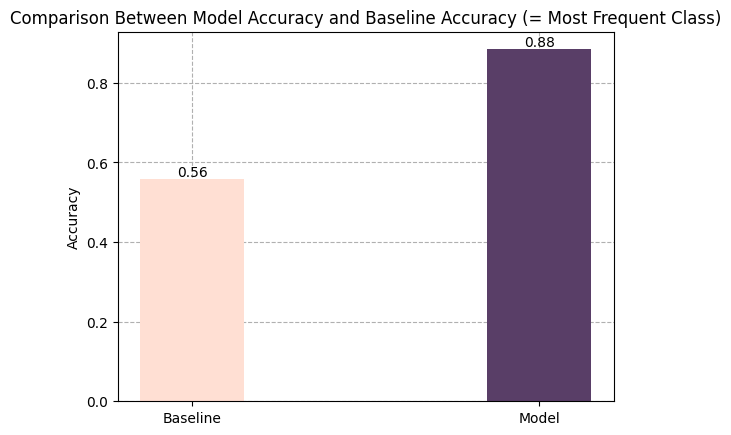

In [9]:
baseline_acc = baseline_accuracy(or3_train_generator, or3_valid_generator, verbose=True)

compare_accuracies(baseline_acc, or3_valid['accuracy'][-1])

In [10]:
or3_predictions = or3_model.predict(or3_valid_generator, batch_size, set='validation')
pd.DataFrame(or3_predictions).to_csv('../results/nlexique_or3_predictions.csv', index=False)

In [11]:
# hyperparameters = {'embed_dim': 128,
#                    'hidden_size': 256,
#                    'batch_size': 64,
#                    'n_epochs': 20,
#                    'lr': 0.001}

# # Averaging results over 10 runs
# or3_t, or3_v = statistical_check(or3_train_set, or3_valid_set, hyperparameters, runs=10, reverse_nouns=True, df=True, device=DEVICE)

### Phonetic Form (3 classes)

In [ ]:
ph3_train_set, or3_valid_set = train_test_split(orthography_data_3gen, test_size=0.2)

In [12]:
# ph3_data_generator = DataGenerator(phonetic_data_3gen, reverse_nouns=True, df=True)
# ph3_model = GenderLSTM(ph3_data_generator, embedding_dim, hidden_size, device=DEVICE)
# ph3_train, ph3_valid = ph3_model.train_model(ph3_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/phonetic_3gen.pth')

In [13]:
# ph3_predictions = ph3_model.predict(ph3_data_generator, batch_size)
# ph3_predictions_df = pd.DataFrame(ph3_predictions)
# ph3_predictions_df

In [14]:
# plot_metrics(ph3_train['accuracy'], ph3_valid['accuracy'], ph3_train['loss'], ph3_valid['loss'])

In [15]:
# baseline_acc = baseline_accuracy(ph3_data_generator, verbose=True)

# compare_accuracies(baseline_acc, ph3_valid['accuracy'][-1])

In [16]:
# # Averaging results over 10 runs
# ph3_t, ph3_v = statistical_check(phonetic_data_3gen, hyperparameters, runs=10, device=DEVICE)

### Orthographic Form (binary)

In [17]:
# or2_data_generator = DataGenerator(orthography_data_2gen, reverse_nouns=True, df=True)
# or2_model = GenderLSTM(or2_data_generator, embedding_dim, hidden_size, device=DEVICE)
# or2_train, or2_valid = or2_model.train_model(or2_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/orthography_2gen.pth')

In [18]:
# or2_predictions = or2_model.predict(or2_data_generator, batch_size)
# or2_predictions_df = pd.DataFrame(or2_predictions)
# or2_predictions_df

In [19]:
# plot_metrics(or2_train['accuracy'], or2_valid['accuracy'], or2_train['loss'], or2_valid['loss'])

In [20]:
# baseline_acc = baseline_accuracy(or2_data_generator, verbose=True)

# compare_accuracies(baseline_acc, or2_valid['accuracy'][-1])

In [21]:
# # Averaging results over 10 runs
# or2_t, or2_v = statistical_check(orthography_data_2gen, hyperparameters, runs=10, device=DEVICE)

### Phonetic Form (binary)

In [22]:
# ph2_data_generator = DataGenerator(phonetic_data_2gen, reverse_nouns=True, df=True)
# ph2_model = GenderLSTM(ph2_data_generator, embedding_dim, hidden_size, device=DEVICE)
# ph2_train, ph2_valid = ph2_model.train_model(ph2_data_generator, n_epochs, batch_size, lr, model_path='../saved_models/phonetic_2gen.pth')

In [23]:
# ph2_predictions = ph2_model.predict(ph2_data_generator, batch_size)
# ph2_predictions_df = pd.DataFrame(ph2_predictions)
# ph2_predictions_df

In [24]:
# plot_metrics(ph2_train['accuracy'], ph2_valid['accuracy'], ph2_train['loss'], ph2_valid['loss'])

In [25]:
# baseline_acc = baseline_accuracy(ph2_data_generator, verbose=True)

# compare_accuracies(baseline_acc, ph2_valid['accuracy'][-1])

In [26]:
# # Averaging results over 10 runs
# ph2_t, ph2_v = statistical_check(phonetic_data_2gen, hyperparameters, runs=10, device=DEVICE)

In [27]:
# data = {'Orthographic Form (M/F/B)': [f"{(or3_t['avg_accuracy'].item() * 100):.2f}%", f"{(or3_v['avg_accuracy'].item() * 100):.2f}%"],
#         'Phonetic Form (M/F/B)': [f"{(ph3_t['avg_accuracy'].item() * 100):.2f}%", f"{(ph3_v['avg_accuracy'].item() * 100):.2f}%"],
#         'Orthographic Form (M/F)': [f"{(or2_t['avg_accuracy'].item() * 100):.2f}%", f"{(or2_v['avg_accuracy'].item() * 100):.2f}%"], 
#         'Phonetic Form (M/F)': [f"{(ph2_t['avg_accuracy'].item() * 100):.2f}%", f"{(ph2_v['avg_accuracy'].item() * 100):.2f}%"]}

# accuracy_results = pd.DataFrame(data).rename(index={0:'Training Accuracy', 1: 'Validation Accuracy'})
# accuracy_results

In [28]:
# or3_t

In [29]:
# plateau_data = {'Orthographic Form': [or3_t['avg_plateau_beg'], or3_v['avg_plateau_beg']],
#                 'Phonetic Form': [ph3_t['avg_plateau_beg'], ph3_v['avg_plateau_beg']],
#                 }

# plateau_results = pd.DataFrame(plateau_data).rename(index={0:'Training Set', 1: 'Validation Set'})
# plateau_results